# Recent Data Time Series Analysis
## Baseline Model
Katlyn Goeujon-Mackness <br>
01/04/2025

### Description
A **baseline model** in time series analysis is a trivial solution that uses heuristics (simple statistics) to compute a forecast. It is used to compare more complex models in order to judge performance. 

### Objective
This notebook explores four types of baseline model to find the best fit, using **historical quarterly earnings data from Cigna Group (CI)**.
1. Historical mean
2. Last year's mean
3. Last known value
4. Seasonal forecast

### Data Collection

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [ ]:

# Load earnings data from Kaggle dataset
data = pd.read_csv("data/earnings_latest.csv" )

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168603 entries, 0 to 168602
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   symbol        168603 non-null  object 
 1   date          168603 non-null  object 
 2   qtr           167599 non-null  object 
 3   eps_est       111347 non-null  float64
 4   eps           136216 non-null  float64
 5   release_time  108400 non-null  object 
dtypes: float64(2), object(4)
memory usage: 7.7+ MB


In [ ]:
# Filter for CI
earnings = data[data['symbol'] == 'CI']

# Select date and actual EPS columns
earnings = earnings[['date', 'eps']]
earnings.reset_index(drop=True, inplace=True)
earnings


,date,eps
0,2009-07-30,NaN
1,2009-11-05,1.13
2,2010-02-04,1.03
3,2010-05-06,1.01
4,2010-08-05,1.38
5,2010-10-29,1.10
6,2011-02-03,1.15
7,2011-05-05,1.37
8,2011-08-04,1.53
9,2011-10-28,NaN


### Data Exploration

In [64]:
earnings.describe()

,eps
count,49.000000
mean,0.889796
std,0.359377
min,0.420000
25%,0.620000
50%,0.800000
75%,1.150000
max,1.960000


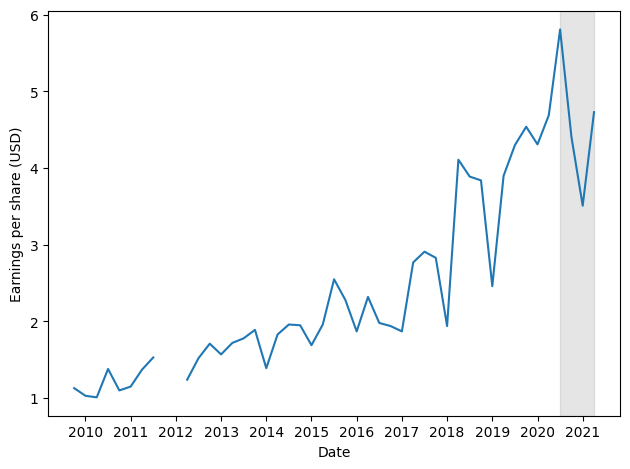

In [110]:
# Plot data in a line graph
fig, ax = plt.subplots()

ax.plot(earnings['date'], earnings['eps'])
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

# Highlight the last four quarters, which the baseline will predict
ax.axvspan(44, 47, color="#808080", alpha=0.2)

# Label ticks
plt.xticks(np.arange(2, 47, 4), [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.tight_layout()


### Baseline Modeling
#### 1. Historical mean

In [112]:
# Split data into training and test sets
#  The last four entries are used to test the predicitons from the remaining entries
train = earnings[:-4]
test = earnings[-4:]

In [114]:
historical_mean = np.mean(train['eps'])
print(historical_mean)

2.2734146341463415


In [115]:
# Naively forecast for each quarter of 1980
test.loc[:, 'pred_mean'] = historical_mean
test

,date,eps,pred_mean
44,2020-07-30,5.81,2.273415
45,2020-11-05,4.41,2.273415
46,2021-02-04,3.51,2.273415
47,2021-05-07,4.73,2.273415


In [116]:
# Calculate mean absolute percentage error (MAPE)
#  Returns % of how much the forecast values deviate
#  from the actual values on avg

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [117]:
mape_hist_mean = mape(test['eps'], test['pred_mean'])
print(mape_hist_mean)

49.1214815149725


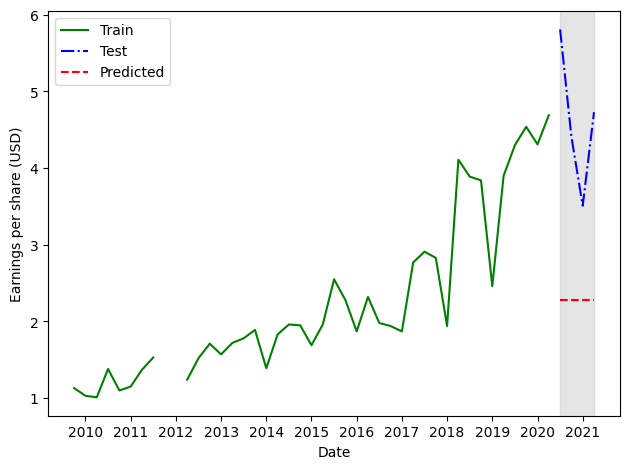

In [121]:
# Visualize the historical mean forecast
# Plot data in a line graph
fig, ax = plt.subplots()

ax.plot(train['date'], train['eps'], 'g-', label="Train")
ax.plot(test['date'], test['eps'], 'b-.', label="Test")
ax.plot(test['date'], test['pred_mean'], 'r--', label="Predicted")

ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.legend(loc=2)

# Highlight the last four quarters, which the baseline will predict
ax.axvspan(44, 47, color="#808080", alpha=0.2)

# Label ticks
plt.xticks(np.arange(2, 47, 4), [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.tight_layout()

Comments: The prediction line is significantly different than the actual values for 2020-2021. Given the obvious and consistent upward trend, historical mean is likely not the most effective baseline. A more recent period of time could improve the prediction.

#### 2. Last year's mean

In [125]:
# Calculate the mean from the last four quarters
last_year_mean = np.mean(train.eps[-4:])
print(last_year_mean)

4.46


In [126]:
# Create a new column with the last year's mean value
test.loc[:, 'pred_last_yr_mean'] = last_year_mean
test

,date,eps,pred_mean,pred_last_yr_mean
44,2020-07-30,5.81,2.273415,4.46
45,2020-11-05,4.41,2.273415,4.46
46,2021-02-04,3.51,2.273415,4.46
47,2021-05-07,4.73,2.273415,4.46


In [128]:
# Calculate MAPE
mape_last_yr_mean = mape(test['eps'], test['pred_last_yr_mean'])
print(mape_last_yr_mean)

14.285839875240669


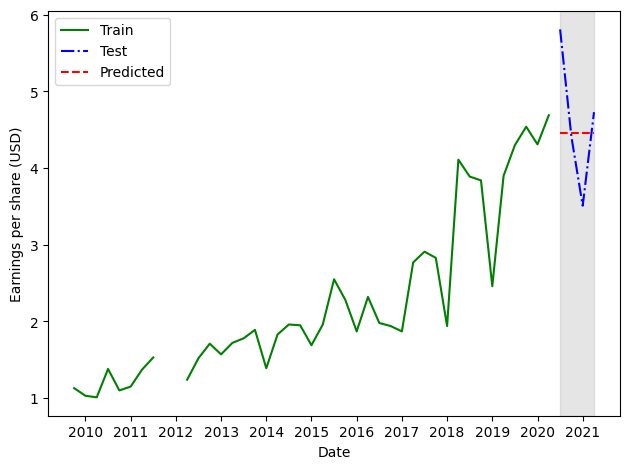

In [129]:
# Visualize last year's mean forecast
# Plot data in a line graph
fig, ax = plt.subplots()

ax.plot(train['date'], train['eps'], 'g-', label="Train")
ax.plot(test['date'], test['eps'], 'b-.', label="Test")
ax.plot(test['date'], test['pred_last_yr_mean'], 'r--', label="Predicted")

ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.legend(loc=2)

# Highlight the last four quarters, which the baseline will predict
ax.axvspan(44, 47, color="#808080", alpha=0.2)

# Label ticks
plt.xticks(np.arange(2, 47, 4), [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.tight_layout()

Comments: The last year's mean baseline is a clear improvement on the overall mean, visible in the line graph as well as the improvement of MAPE from ~49% to ~14%.

#### 3. Last known value

In [130]:
# Extract the last known value from the training set
#  (last quarter of 1979)
last = train.eps.iloc[-1]
print(last)

4.69


Comments: Note that the last known value is close to last year's mean (4.46).

In [131]:
# Create a new column to display the last known value
test.loc[:,'pred_last'] = last
test

,date,eps,pred_mean,pred_last_yr_mean,pred_last
44,2020-07-30,5.81,2.273415,4.46,4.69
45,2020-11-05,4.41,2.273415,4.46,4.69
46,2021-02-04,3.51,2.273415,4.46,4.69
47,2021-05-07,4.73,2.273415,4.46,4.69


In [132]:
# Calculate the MAPE for the last known value
mape_last = mape(test['eps'], test['pred_last'])
print(mape_last)

15.022553590779989


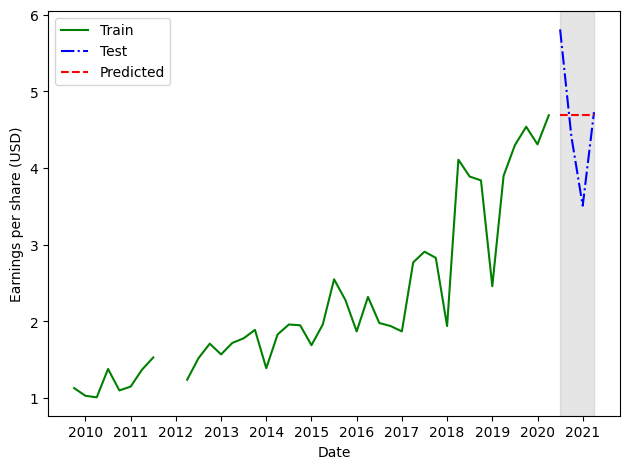

In [133]:
# Visualize last year's mean forecast
# Plot data in a line graph
fig, ax = plt.subplots()

ax.plot(train['date'], train['eps'], 'g-', label="Train")
ax.plot(test['date'], test['eps'], 'b-.', label="Test")
ax.plot(test['date'], test['pred_last'], 'r--', label="Predicted")

ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.legend(loc=2)

# Highlight the last four quarters, which the baseline will predict
ax.axvspan(44, 47, color="#808080", alpha=0.2)

# Label ticks
plt.xticks(np.arange(2, 47, 4), [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.tight_layout()

Comments: The last known value did not improve the MAPE score compared to the last year's values mean. 

#### 4. Seasonal Forecast
Considering the seasonal cyclical behavior of the data, seasonal forecast could be useful as a baseline model. This baseline model take the last observed cycle and repeats it into the future.

In [134]:
# Assign the last four values to corresponding quarters in the previous year

# Append values to the test DataFrame to hold the predictions
test.loc[:, 'pred_last_season'] = train['eps'][-4:].values
test

,date,eps,pred_mean,pred_last_yr_mean,pred_last,pred_last_season
44,2020-07-30,5.81,2.273415,4.46,4.69,4.30
45,2020-11-05,4.41,2.273415,4.46,4.69,4.54
46,2021-02-04,3.51,2.273415,4.46,4.69,4.31
47,2021-05-07,4.73,2.273415,4.46,4.69,4.69


In [136]:
# Calculate the MAPE for seasonal forecast
mape_seasonal = mape(test['eps'], test['pred_last_season'])
print(mape_seasonal)

13.143801884145315


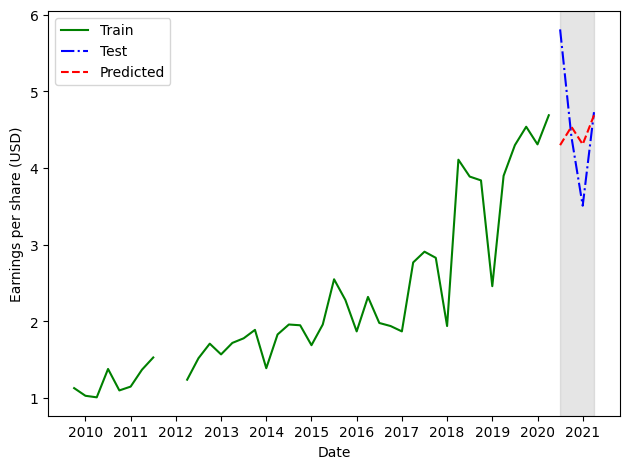

In [135]:
# Visualize last year's mean forecast
# Plot data in a line graph
fig, ax = plt.subplots()

ax.plot(train['date'], train['eps'], 'g-', label="Train")
ax.plot(test['date'], test['eps'], 'b-.', label="Test")
ax.plot(test['date'], test['pred_last_season'], 'r--', label="Predicted")

ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.legend(loc=2)

# Highlight the last four quarters, which the baseline will predict
ax.axvspan(44, 47, color="#808080", alpha=0.2)

# Label ticks
plt.xticks(np.arange(2, 47, 4), [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.tight_layout()

Comments: As hypothesized, the seasonal forecast shows a slight improvement in MAPE. This is also demonstrated in the line graph.

### Conclusions
Due to the cyclical nature of the data, the seasonal forecast is expected to be the best baseline model to use in constructing the model.